<a href="https://colab.research.google.com/github/jungwoo1208/AI_Study/blob/main/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', version=1,cache=True, as_frame=False)

In [13]:
mnist.target = mnist.target.astype(np.int8)

In [14]:
x =mnist.data/255
y  = mnist.target

이 이미지 데이터의 레이블은 5이다


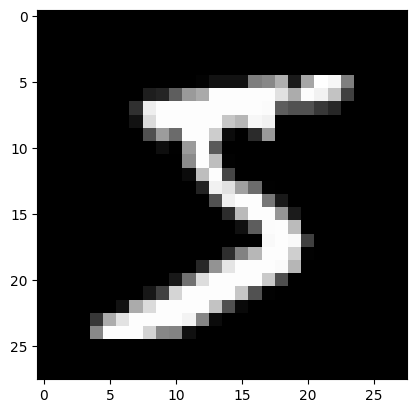

In [16]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/7, random_state=42)

In [20]:
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [21]:
from torch import nn
from torch import optim

In [26]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [28]:
epochs =30

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer.zero_grad()
        y_pred = model(data)
        loss = loss_fn(y_pred, targets)
        loss.backward()
        optimizer.step()
    print("Epoch {:4d}/{} Loss: {:.3f}".format(epoch+1, epochs, loss))

Epoch    1/30 Loss: 0.120
Epoch    2/30 Loss: 0.259
Epoch    3/30 Loss: 0.016
Epoch    4/30 Loss: 0.103
Epoch    5/30 Loss: 0.154
Epoch    6/30 Loss: 0.002
Epoch    7/30 Loss: 0.086
Epoch    8/30 Loss: 0.153
Epoch    9/30 Loss: 0.054
Epoch   10/30 Loss: 0.138
Epoch   11/30 Loss: 0.002
Epoch   12/30 Loss: 0.005
Epoch   13/30 Loss: 0.112
Epoch   14/30 Loss: 0.129
Epoch   15/30 Loss: 0.007
Epoch   16/30 Loss: 0.010
Epoch   17/30 Loss: 0.029
Epoch   18/30 Loss: 0.243
Epoch   19/30 Loss: 0.153
Epoch   20/30 Loss: 0.000
Epoch   21/30 Loss: 0.000
Epoch   22/30 Loss: 0.002
Epoch   23/30 Loss: 0.007
Epoch   24/30 Loss: 0.116
Epoch   25/30 Loss: 0.000
Epoch   26/30 Loss: 0.000
Epoch   27/30 Loss: 0.013
Epoch   28/30 Loss: 0.003
Epoch   29/30 Loss: 0.064
Epoch   30/30 Loss: 0.000


In [29]:
model.eval()
correct = 0
with torch.no_grad():
    for data, targets in loader_test:
        outputs = model(data)
        _, predicted = torch.max(outputs.data,1)
        correct += predicted.eq(targets.data.view_as(predicted)).sum()
data_num = len(loader_test.dataset)
print('테스트 데이터에서 예측 정확도: {:.2f}%'.format(100.*correct/data_num))

테스트 데이터에서 예측 정확도: 96.58%
